In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('COVID-19-time-series-clean-complete.csv')
data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['YearMonth'] = data['Date'].map(lambda date: date.year*100 + date.month)
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001


In [10]:
april_data = data.query('YearMonth==202004').reset_index(drop = True)
april_data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
1,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
2,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
3,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
4,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004
...,...,...,...,...,...,...,...,...,...,...,...
5785,19295,2020-04-30,Vietnam,270,0,219.0,51.0,0,0,-3,202004
5786,19296,2020-04-30,West Bank and Gaza,344,2,76.0,266.0,0,0,5,202004
5787,19297,2020-04-30,Yemen,6,2,1.0,3.0,0,2,1,202004
5788,19298,2020-04-30,Zambia,106,3,55.0,48.0,9,0,1,202004


In [11]:
april_data_sumNewCases = april_data.groupby('Country/Region')['New cases'].sum().reset_index()
april_data_sumNewCases

,Country/Region,New cases
0,Afghanistan,1952
1,Albania,530
2,Algeria,3290
3,Andorra,369
4,Angola,20
...,...,...
188,Vietnam,58
189,West Bank and Gaza,225
190,Yemen,6
191,Zambia,71


In [19]:
april_data_sumNewCases_sort = april_data_sumNewCases.sort_values('New cases', ascending=False).reset_index(drop=True)
april_data_sumNewCases_sort.head(8)

,Country/Region,New cases
0,US,888804
1,France,140313
2,United Kingdom,139956
3,Spain,127546
4,Turkey,106673
5,Russia,104161
6,Italy,99671
7,Germany,91201


In [34]:
april_data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
1,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
2,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
3,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
4,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004
...,...,...,...,...,...,...,...,...,...,...,...
5785,19295,2020-04-30,Vietnam,270,0,219.0,51.0,0,0,-3,202004
5786,19296,2020-04-30,West Bank and Gaza,344,2,76.0,266.0,0,0,5,202004
5787,19297,2020-04-30,Yemen,6,2,1.0,3.0,0,2,1,202004
5788,19298,2020-04-30,Zambia,106,3,55.0,48.0,9,0,1,202004


In [35]:
iran_aprilData = april_data[april_data['Country/Region'] == 'Iran'].reset_index()
iran_aprilData.head()

,index,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,80,13590,2020-04-01,Iran,47593,3036,15473.0,29084.0,2988,138,817,202004
1,273,13783,2020-04-02,Iran,50468,3160,16711.0,30597.0,2875,124,1238,202004
2,466,13976,2020-04-03,Iran,53183,3294,17935.0,31954.0,2715,134,1224,202004
3,659,14169,2020-04-04,Iran,55743,3452,19736.0,32555.0,2560,158,1801,202004
4,852,14362,2020-04-05,Iran,58226,3603,19736.0,34887.0,2483,151,0,202004


In [37]:
iran_aprilData['Day'] = iran_aprilData['Date'].map(lambda date: date.day)
iran_aprilData.head()

,index,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth,Day
0,80,13590,2020-04-01,Iran,47593,3036,15473.0,29084.0,2988,138,817,202004,1
1,273,13783,2020-04-02,Iran,50468,3160,16711.0,30597.0,2875,124,1238,202004,2
2,466,13976,2020-04-03,Iran,53183,3294,17935.0,31954.0,2715,134,1224,202004,3
3,659,14169,2020-04-04,Iran,55743,3452,19736.0,32555.0,2560,158,1801,202004,4
4,852,14362,2020-04-05,Iran,58226,3603,19736.0,34887.0,2483,151,0,202004,5


In [46]:
iran_april_dayData = iran_aprilData.groupby(['Day'])['New cases'].sum().reset_index()
iran_april_dayData['New deaths'] = iran_aprilData['New deaths']
iran_april_dayData.head()

,Day,New cases,New deaths
0,1,2988,138
1,2,2875,124
2,3,2715,134
3,4,2560,158
4,5,2483,151


Text(0.5, 1.0, ' New cases & deaths in April 2020 of Iran')

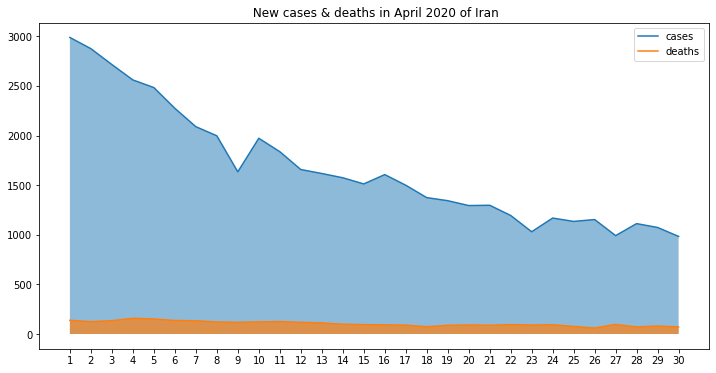

In [59]:
plt.figure(figsize=(12, 6))

plt.plot(iran_april_dayData['Day'].to_numpy(dtype=str), iran_april_dayData['New cases'], label='cases')
plt.plot(iran_april_dayData['Day'].to_numpy(dtype=str), iran_april_dayData['New deaths'], label='deaths')

plt.fill_between(iran_april_dayData['Day'].to_numpy(dtype=str), iran_april_dayData['New cases'], alpha=0.5)
plt.fill_between(iran_april_dayData['Day'].to_numpy(dtype=str), iran_april_dayData['New deaths'], alpha=0.7)

plt.legend()
plt.title(' New cases & deaths in April 2020 of Iran')